In [1]:
import projetLib as proj
from torch.utils.data import DataLoader
import torch
from torch.utils.data import Subset
import torchvision
from tqdm import tqdm
import sys

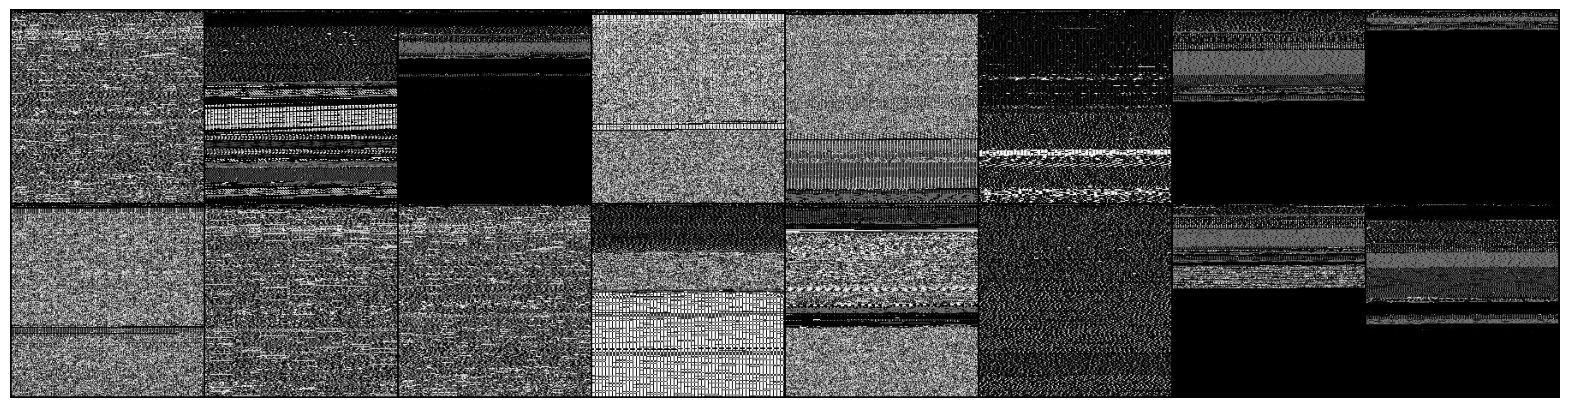

In [4]:
batch_size = 16
resize = (224,224)
sizeTrain = [5000,5000]
sizeTest = [1000,1000]

trainDataset, testDataset = proj.image.getTrainTest(
    resize=resize, batch_size=batch_size, trainSize=sizeTrain, testSize=sizeTest,
    extensions=["pe"], seed=1, doRGB=False)
dataloader = DataLoader(trainDataset, num_workers=2, batch_size=16, shuffle=True)
x,y  = next(iter(dataloader)) # On itére en général sur un dataloader avec une boucle pour récupérer des batch (de taille batch_size) mais on peut aussi récupérer seulement le premier batch comme ici
proj.utils.plot_img(x) # Affichage du premier batch

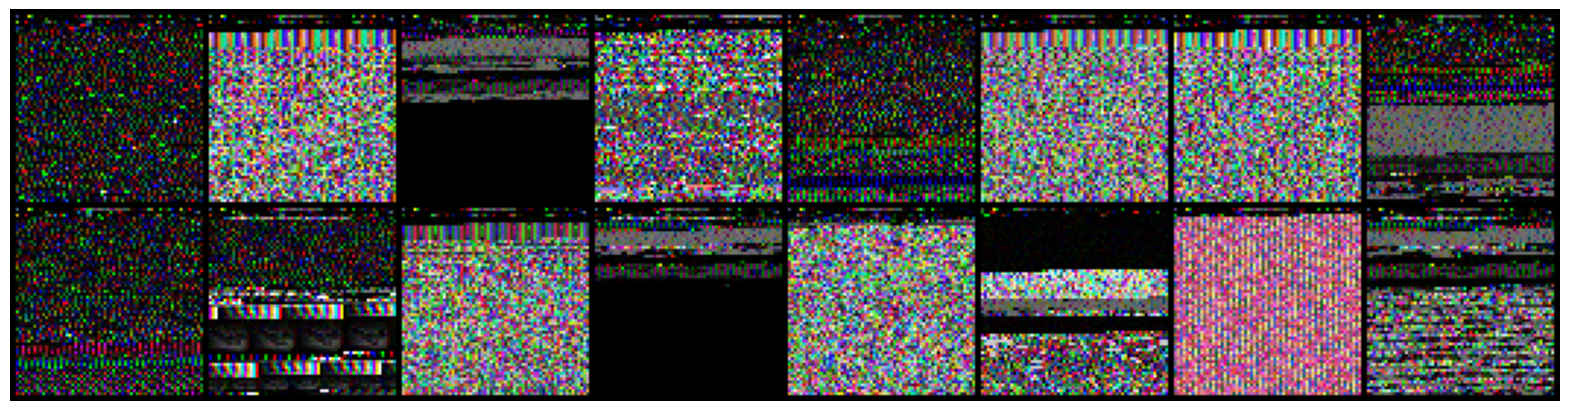

In [5]:

batch_size = 16
resize = (64,64)
sizeTrain = [5000,5000]
sizeTest = [1000,1000]

trainDataset, testDataset = proj.image.getTrainTest(
    resize=resize, batch_size=batch_size, trainSize=sizeTrain, testSize=sizeTest,
    extensions=["pe"], seed=1, doRGB=True)
dataloader = DataLoader(trainDataset, num_workers=2, batch_size=16, shuffle=True)
x,y  = next(iter(dataloader)) # On itére en général sur un dataloader avec une boucle pour récupérer des batch (de taille batch_size) mais on peut aussi récupérer seulement le premier batch comme ici
proj.utils.plot_img(x) # Affichage du premier batch

In [1]:
import projetLib as proj
import torch 
from torch.utils.data import DataLoader

batch_size = 16
resize = (224,224)
sizeTrain = [5000,5000]
sizeTest = [1000,1000]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trainDataset, testDataset = proj.image.getTrainTest(
    resize=resize, batch_size=batch_size, trainSize=sizeTrain, testSize=sizeTest,
    extensions=["pe"], seed=1, doRGB=False)

testloader = DataLoader(testDataset, num_workers=2, batch_size=batch_size, shuffle=True)
model = proj.model.Basic().to(device)
proj.process.test_malware(model, testloader)


Testing progress:   0%|          | 0/125 [00:00<?, ?it/s]torch.Size([16, 1, 224, 224])
torch.Size([16, 128, 27, 27])
torch.Size([16, 93312])
torch.Size([16, 1])
torch.Size([16, 1])
Testing progress:   1%|          | 1/125 [00:01<03:46,  1.83s/it]torch.Size([16, 1, 224, 224])
torch.Size([16, 128, 27, 27])
torch.Size([16, 93312])
torch.Size([16, 1])
torch.Size([16, 1])
Testing progress:   2%|▏         | 2/125 [00:02<01:46,  1.15it/s]torch.Size([16, 1, 224, 224])
torch.Size([16, 128, 27, 27])
torch.Size([16, 93312])
torch.Size([16, 1])
torch.Size([16, 1])
Testing progress:   2%|▏         | 3/125 [00:02<01:07,  1.80it/s]torch.Size([16, 1, 224, 224])
torch.Size([16, 128, 27, 27])
torch.Size([16, 93312])
torch.Size([16, 1])
torch.Size([16, 1])
Testing progress:   3%|▎         | 4/125 [00:02<01:02,  1.95it/s]torch.Size([16, 1, 224, 224])
torch.Size([16, 128, 27, 27])
torch.Size([16, 93312])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1, 224, 224])
torch.Size([16, 128, 27, 27])
tor

KeyboardInterrupt: 

In [1]:
import projetLib as proj
from torch.utils.data import DataLoader
import torch
from torch.utils.data import Subset
import torchvision
from tqdm import tqdm
import sys

batch_size = 4

trainDataset, testDataset = proj.image.getTrainTest(
    resize=(224,224), batch_size=batch_size, seed=1,
    test_proportion=0.2, extensions=["pe","msdos","elf","other"])
print(len(trainDataset),len(testDataset))

8 16


In [2]:
trainloader = DataLoader(trainDataset, num_workers=2, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testDataset, num_workers=2, batch_size=batch_size, shuffle=True)

for x,y in testloader : 
    print(y)

tensor([0, 0, 1, 0])
tensor([0, 1, 0, 0])
tensor([0, 1, 0, 0])
tensor([0, 1, 0, 0])


In [3]:
print(y)

tensor([0, 1, 0, 0])


In [4]:
y[y==0] = -1
print(y)

tensor([-1,  1, -1, -1])


In [5]:
path = "./data/samples/"
file = "b530de08530d1ba19a94bc075e74e2236c106466dedc92be3abdee9908e8cf7e"
path += file
res = proj.opcodes.extract_sequence(path)

In [9]:
#";".join(res)
res

['begin',
 'sdt',
 'uj',
 'udt',
 'uj',
 ('sdt', 2),
 'uj',
 'udt',
 'uj',
 ('sdt', 2),
 'uj',
 'bai',
 'sdt',
 ('int', 5),
 'bai',
 ('sdt', 2),
 'uj',
 'udt',
 'sdt',
 'uj',
 'sdt',
 'uj',
 'udt',
 'bai',
 'byi',
 'cj',
 'sdt',
 'uj',
 'bai',
 'li',
 ('sdt', 2),
 'bai',
 'int',
 'udt',
 'sdt',
 ('udt', 4),
 'uj',
 'sdt',
 ('udt', 2),
 'uj',
 'sdt',
 'udt',
 'misc',
 ('sdt', 2),
 'uj',
 'bai',
 'byi',
 'cj',
 'misc',
 ('sdt', 2),
 'uj',
 'bai',
 'byi',
 'cj',
 'misc',
 'sdt',
 'uj',
 'bai',
 'udt',
 ('sdt', 2),
 'bai',
 'int',
 ('sdt', 3),
 'uj',
 'bai',
 'li',
 ('sdt', 2),
 'bai',
 'int',
 ('sdt', 3),
 'uj',
 'bai',
 'li',
 ('sdt', 2),
 'bai',
 ('int', 7),
 ('sdt', 2),
 'udt',
 ('sdt', 2),
 'udt',
 'sdt',
 'uj',
 'sdt',
 'misc',
 ('sdt', 3),
 'uj',
 'udt',
 ('bai', 2),
 'cj',
 'bai',
 'cj',
 ('sdt', 3),
 'uj',
 'sdt',
 'misc',
 ('sdt', 3),
 'uj',
 'udt',
 'sdt',
 'bai',
 ('sdt', 2),
 'uj',
 'sdt',
 'misc',
 ('sdt', 3),
 'uj',
 'udt',
 ('bai', 2),
 'cj',
 'bai',
 'cj',
 'udt',
 'uj',
 